## Module 4:

## Team Members:
Sheza Khan, Melanie Lam

## Project Title:
*Applying a SIR Model to MERS-COV in Saudi Arabia*



## Project Goal:
This project seeks to... *understand the SIR model, apply it to MERS-COV infection data in Saudi Arabia, and evaluate the model's effectiveness in predicting future cases.*

## Disease Background:


* Prevalence & incidence
Since April 2012, 2628 laboratory-confirmed cases of MERS have been reported across the world. 948 deaths were recorded, giving a case-fatality ratio of 36%. The majority of these cases occurred in Saudi Arabia; specifically, 2219 cases and 867 deaths. The number of cases was highest from 2013-2016, with a peak at 2014 which hasn't been seen since. Cases are separated into primary and secondary; 50-59 year have a higher risk contracting primary infections, while 30-39 year olds have a higher risk of contracting secondary infections. 
https://www.emro.who.int/health-topics/mers-cov/mers-outbreaks.html
* Economic burden
Finding concrete statistics on the economic impact of MERS is difficult, but a study done by Dove Press journal examined the medical records of 24 patients to get an idea of the medical costs associated with hospitalization as a result of infection. The total cost of handling a case was anywhere from $1278.41 to $75987.95 with a mean of $12947.03 +/- 19923.14. In 75% of patients the cost was less than $20000. The median cost was $1867.30. Patients with higher costs typically had other comorbities and longer hospital stays.
https://www.dovepress.com/article/download/49593
* Risk factors (genetic, lifestyle) & Societal determinants
Factors such as old age, being immunocompromised, and having a chronic disease (for example, renal disease, cancer, chronic lung disease, or diabetes) can increase risk for more severe infection. Most of those who died from the illness had preexisting conditions.
https://www.medicalnewstoday.com/articles/262538#Risk-factors
* Symptoms
MERS can be asymptomatic, but it can also present as mild to severe respiratory symptoms. A common presentation is fever, cough, and shortness of breath. Pneumonia can also sometimes occur, as well as certain gastrointestinal issues such as diarrhea. Severe presentations of the illness causing respiratory failure that requires use of mechanical ventilation. 
https://www.who.int/health-topics/middle-east-respiratory-syndrome-coronavirus-mers#tab=tab_2
* Diagnosis
A diagnosis from a doctor will typically occur after they ask about symptoms and recent activities like travel. In terms of a lab test, a doctor will take a sample from the patient's respiratory tract, which will undergo a test such as a polymerase chain reaction test. Blood tests can also help the doctor determine whether the patient previously had the disease.
https://www.medicalnewstoday.com/articles/262538#diagnosis
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
MERS is a type of coronavirus, which is a positive stranded RNA virus commonly infecting bats. MERS is considered a beta coronavirus. Surface proteins such spike protein transmembrane glycoprotein is essnetial for the virus to enter via binding/fusing to host cells. E protein has functions related to assembly, intracellular transport, and virus budding. The M protein's role is viral morphogensis and assembly; the N protein interacts with the above to form virus particles. Two other polyprteins, pp1a and pp1ab, can be broken down to form omre proteins and enzymes that contribute to the disease pathogenesis. 
https://pmc.ncbi.nlm.nih.gov/articles/PMC7080179/

## Dataset: 

The World Health Organization has compiled data reported by local communities and health care systems across Saudi Arabia to document and study how MERS has been transmitted over time (WHO MERS Global Summary and Assessment of Risk July 2019). The data consists of discrete counts of how many new cases are reported on a certain date, weekly, from 2013-2014 (https://www.kaggle.com/datasets/imdevskp/mers-outbreak-dataset-20122019?select=weekly_clean.csv). The data was likely determined through various molecular tests, including a nose swab, throat swab, sputum collection, or tracheal aspirate collection (https://www.cdc.gov/mers/php/laboratories/index.html).

Epidemiological parameters: MERS has a R0 < 1 with minute variation between different settings, notably healthcare settings can often have an R0 above 1, but can be controlled back to <1 in several weeks (WHO MERS Global Summary and Assessment of Risk July 2019). However, moderate MERS cases can be difficult to properly diagnose and could be missed due to low awareness of the disease, leading to a lower incidence rate than officially reported(https://www.who.int/health-topics/middle-east-respiratory-syndrome-coronavirus-mers#tab=tab_2).

Another assumption of this dataset is that when it is used in a SIR model, we are assuming that the population stays the same, the infected population is truely the entire infected population when people may have not reported or diagnosed, and infectious period is only for as long as data is available. The model also does not account for death.

        date  confirmed_cases
0 2013-10-07                2
1 2013-10-14                3
2 2013-10-21                1
3 2013-10-28                2
4 2013-11-04                2


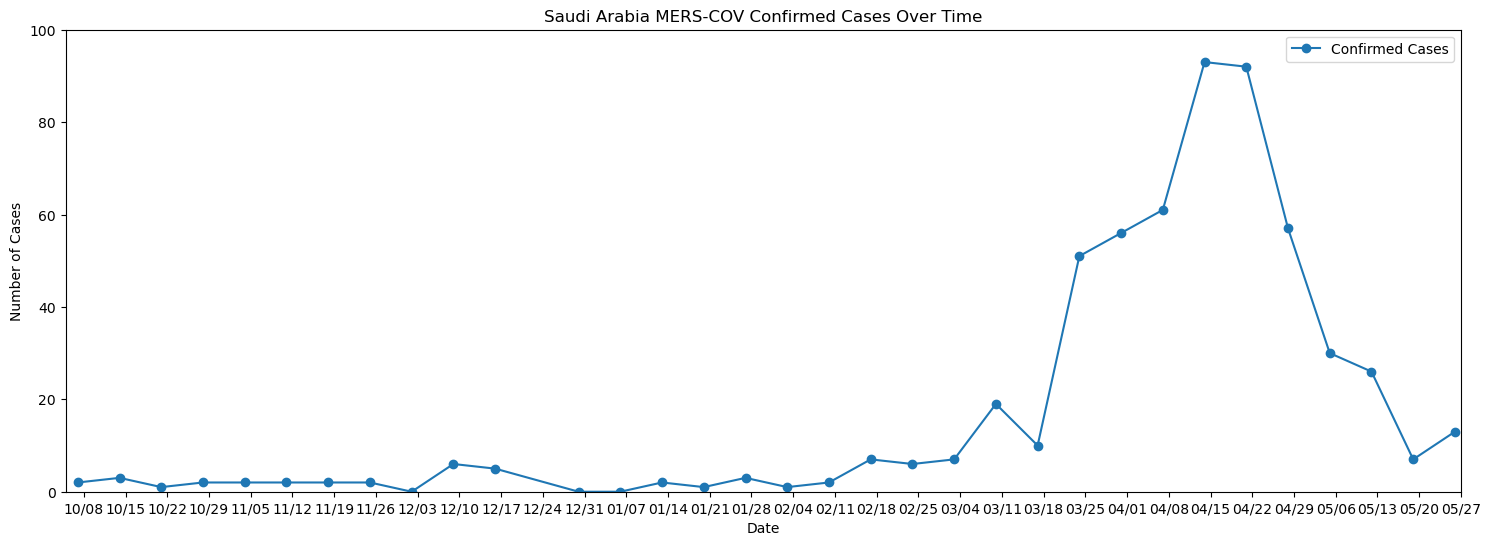

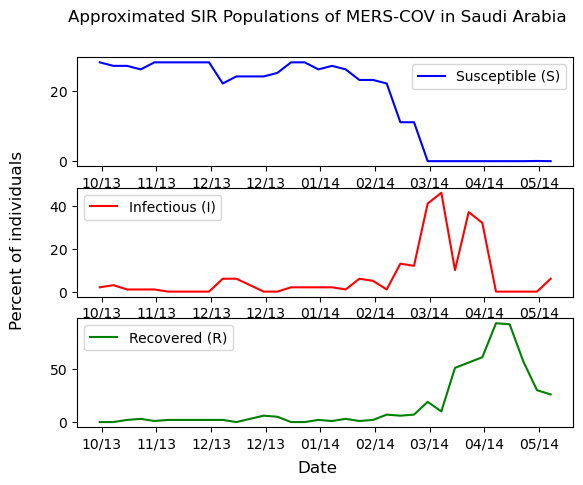

In [1]:
# %% Import needed modules
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pathlib import Path

file_path = Path.cwd() / 'MERS_Saudi_Arabia_data_2013_2014_new_cases.csv'
data = pd.read_csv(file_path)
# %% Load the MERS-COV dataset
#data = pd.read_csv('/Users/Melanie/Downloads/Comp_BME/Module4_GlobalHealth/MERS_Saudi_Arabia_data_2013_2014_new_cases.csv')
# Convert dates to datetime objects for plotting
data['date'] = pd.to_datetime(data['date'])
# Display the first few rows of the dataset
print(data.head())

# %% Plot the confirmed cases over time for all data
plt.figure(figsize=(18, 6))
plt.plot(data['date'],
         data['confirmed_cases'],
         label='Confirmed Cases',
         marker="o")
plt.ylim(0, 100)
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2013-10-05'), pd.Timestamp('2014-05-27'))
# Format ticks as M/D (no leading zeros)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.ylabel('Number of Cases')
plt.title('Saudi Arabia MERS-COV Confirmed Cases Over Time')
plt.legend()
plt.show()


# %% Using the convert_cumulative_to_SIR function to approximate S(t), I(t), and R(t)
population = 30050000/1e6   #Saudi Arabia population in 2013 in millions, Statista
data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=population,
    infectious_period=2, #From CDC, 2-14 day incubation period which converted to weeks is 2
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est')


# %% Plot the SIR estimates over time
fig, axs = plt.subplots(3,1)
axs[0].plot(data_sir['date'],
            data_sir['S_est'],
            label='Susceptible (S)',
            color='blue')
axs[1].plot(data_sir['date'],
            data_sir['I_est'],
            label='Infectious (I)',
            color='red')
axs[2].plot(data_sir['date'],
         data_sir['R_est'],
         label='Recovered (R)',
         color='green')
fig.suptitle('Approximated SIR Populations of MERS-COV in Saudi Arabia', fontsize=12)
fig.supxlabel('Date')
fig.supylabel('Percent of individuals')
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax.legend()
plt.show()

## Data Analyis: 

### Methods

The first method implemented is Euler's method, where the first derivative is taken to predict the next value given an initial value and a step size. The RK4 method is then used and is similar to Euler's, though it takes multiple midpoints between step sizes to calculate the derivative and therefore more precisely predict the next value given an initial value and a step size.


### Analysis

#### 1. Fitting the SIR Model

In [2]:
# %% Import Euler integrator function from main functions and array modules
from main_functions import euler_sir
import numpy as np


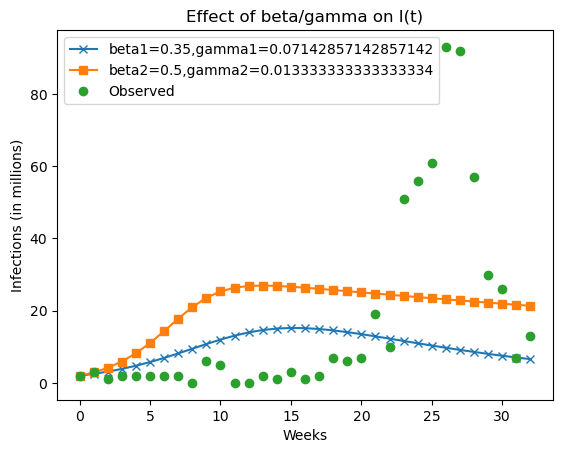

753.2377131741237
662.9797619924236


In [3]:
# %% Plug in guesses for gamma and beta
I_obs = data['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in weeks

N = population
I0_obs = data.iloc[0]['confirmed_cases']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

beta1 = .35 #random guess for beta
gamma1 = 1/14 #random guess for gamma
beta2 = 0.5 #alternative guesses
gamma2 = 1/75 #alternative guesses
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, N)
S2,I2,R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

# Plot the model predictions against the data
plt.plot(t_obs, I1, label=f'beta1={beta1},gamma1={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta2={beta2},gamma2={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections (in millions)')
plt.title('Effect of beta/gamma on I(t)')
plt.show()

# Calculate SSE for both guesses
print(np.mean((I1 - I_obs)**2))
print(np.mean((I2 - I_obs)**2))

Best beta: 0.28
Minimum SSE: 0.0004393522117655361
Best gamma: 0.0
Minimum SSE: 24.2537986924435


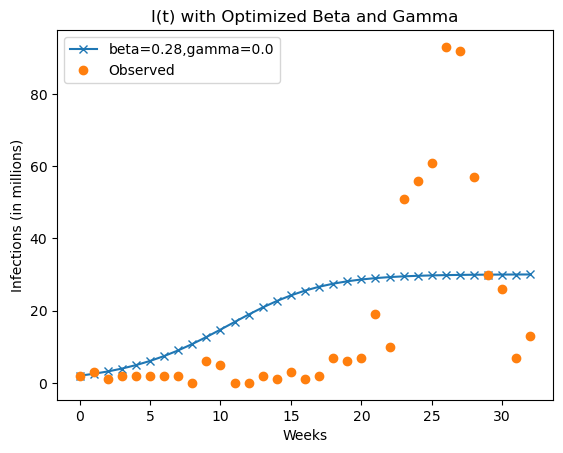

511.9161055976593


In [4]:
# Use an optimization routine to minimize SSE and find the best-fitting parameters.


#Define a function to calculate SSE from given beta and gamma
def SSE(beta, gamma):
    S, I, R = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, N)
    return np.mean(I - I_obs)**2


#Set an array of beta values to iterate through and test
betas = np.arange(0, 1, 0.01)
#Default gamma value for testing
gamma_test = 1/75
#Create array for all SSE values for corresponding beta
beta_SSE = np.empty(len(betas))

#Loop through beta values to test SSE
for i, beta in enumerate(betas):
    beta_SSE[i] = SSE(beta, gamma_test)

# Find the index of the minimum SSE
betamin_index = np.argmin(beta_SSE)
# Get the beta value that gives the minimum SSE
best_beta = betas[betamin_index]
best_betaSSE = beta_SSE[betamin_index]
print("Best beta:", best_beta)
print("Minimum SSE:", best_betaSSE)

#Same routine for gamma
gammas = np.arange(0, 1, 0.001)
beta_test = 0.000439
gamma_SSE = np.empty(len(gammas))

for i, gamma in enumerate(gammas):
    gamma_SSE[i] = SSE(beta, gamma_test)

gammamin_index = np.argmin(gamma_SSE)
best_gamma = gammas[gammamin_index]
best_gammaSSE = gamma_SSE[gammamin_index]
print("Best gamma:", best_gamma)
print("Minimum SSE:", best_gammaSSE)


#Find SIR model parameters with optimized beta and gamma
S, I, R = euler_sir(best_beta, best_gamma, S0_obs, I0_obs, R0_obs, t_obs, N)


# Plot the model predictions against the data
plt.plot(t_obs, I, label=f'beta={best_beta},gamma={best_gamma}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections (in millions)')
plt.title('I(t) with Optimized Beta and Gamma')
plt.show()


# Calculate SSE for optimized beta and gamma
print(np.mean((I - I_obs)**2))


#### 2. Predict "the future" with your fit SIR model

Best beta (first half): 0.02
Minimum SSE (first half): 2.566025803715273
Best gamma (first half): 0.017
Minimum SSE (first half): 2.5615395760985824


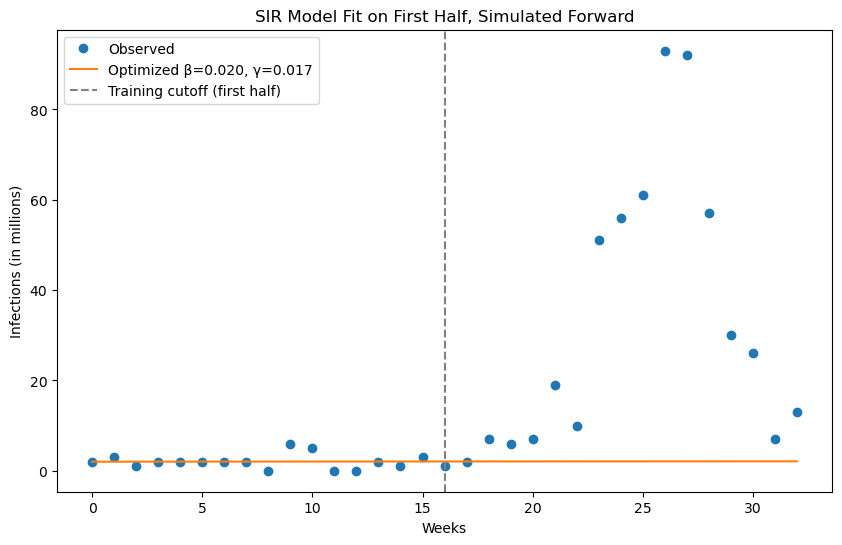

Training SSE (first half): 2.5615395760985824
Testing SSE (second half): 1768.120973393047


In [5]:
#Fitting beta and gamma on first half of data then predicting the second half


# Split data into first half
half = len(I_obs) // 2
I_obs_first = I_obs[:half]
t_obs_first = t_obs[:half]


# Reset initial conditions for first half
I0_obs_first = I_obs[0]          
R0_obs_first = 0.0               
S0_obs_first = N - I0_obs_first - R0_obs_first


#SSE function for first half
def SSE_first(beta, gamma):
    S, I, R = euler_sir(beta, gamma, S0_obs_first, I0_obs_first, R0_obs_first, t_obs_first, N)
    return np.mean((I - I_obs_first)**2)


#optimize beta
betas = np.arange(0, 1, 0.01)
gamma_test = 1/75
beta_SSE_first = np.array([SSE_first(beta, gamma_test) for beta in betas])
best_beta_first = betas[np.argmin(beta_SSE_first)]
best_betaSSE_first = beta_SSE_first[np.argmin(beta_SSE_first)]
print("Best beta (first half):", best_beta_first)
print("Minimum SSE (first half):", best_betaSSE_first)


#optimize gamma
gammas = np.arange(0, 1, 0.001)
gamma_SSE_first = np.array([SSE_first(best_beta_first, gamma) for gamma in gammas])
best_gamma_first = gammas[np.argmin(gamma_SSE_first)]
best_gammaSSE_first = gamma_SSE_first[np.argmin(gamma_SSE_first)]
print("Best gamma (first half):", best_gamma_first)
print("Minimum SSE (first half):", best_gammaSSE_first)


#simulate forward with new optimized parameters from first half
S1_opt, I1_opt, R1_opt = euler_sir(best_beta_first, best_gamma_first,
                                   S0_obs_first, I0_obs_first, R0_obs_first, t_obs, N)


#plotting
plt.figure(figsize=(10,6))
plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.plot(t_obs, I1_opt, '-', label=f'Optimized β={best_beta_first:.3f}, γ={best_gamma_first:.3f}')
plt.axvline(x=half, color='gray', linestyle='--', label='Training cutoff (first half)')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections (in millions)')
plt.title('SIR Model Fit on First Half, Simulated Forward')
plt.show()


#calculate test and train error
train_error_first = np.mean((I1_opt[:half] - I_obs[:half])**2)
test_error_first = np.mean((I1_opt[half:] - I_obs[half:])**2)

print("Training SSE (first half):", train_error_first)
print("Testing SSE (second half):", test_error_first)


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

Optimized beta and gamma on full dataset: 
Best beta: 0.28
Minimum SSE: 0.0004393522117655361
Best gamma: 0.0
Minimum SSE: 24.2537986924435

Optimized beta and gamma for the first half:
Best beta (first half): 0.02
Minimum SSE (first half): 2.566025803715273
Best gamma (first half): 0.017
Minimum SSE (first half): 2.5615395760985824

Our new gamma and beta are quite different from that of the full dataset. Our new beta is a ten times smaller with a difference in minimum SSE of ~0.0001. It is hard to tell if our new gamma is close because due to rounding since gamma for the full dataset is printed as  "0.0" whereas gamma for the first half is 0.017. The minimum SSE did increase for beta (0.0004393522117655361 vs 2.566025803715273) but it decreased for gamma (24.2537986924435 vs. 2.5615395760985824). 

Overall, when testing both the optimized beta and gamma on the dataset to find the SSE, the resulting fit was extremely poor, going from 511.9 of the full dataset to 1768 when using the first half. This change was likely because the first half of our data saw very little cases, so the model predicted that the same situation would occur for the second-half. However, MERS-COV cases spiked in the second-half of the data, so this phenomenon was not accounted for in the optimization and therefore computed a higher SSE.

Best beta (second half): 0.91
Minimum SSE (second half): 726.7100805331304
Best gamma (second half): 0.0
Minimum SSE (second half): 691.0249001176303


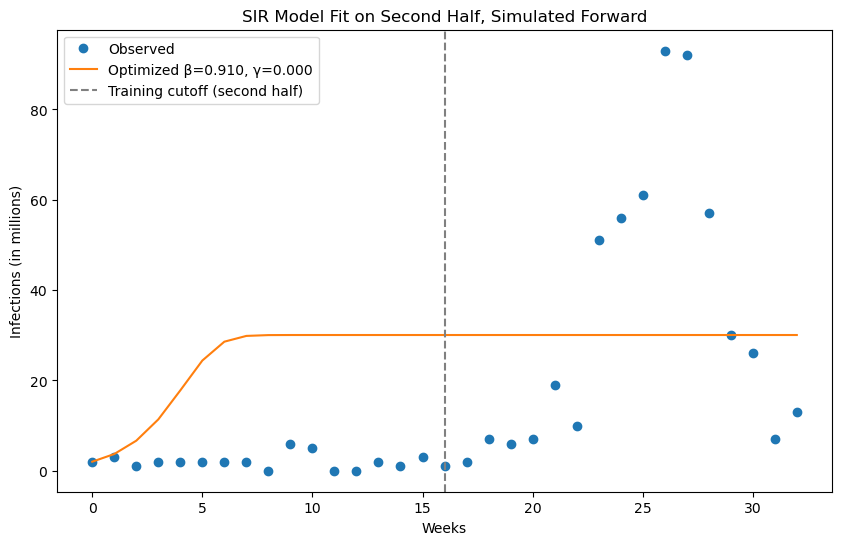

Training SSE (second half): 895.9554411761611
Testing SSE (first half): 539.3191233343932


In [6]:
#fitting beta and gamma on second half


#initial conditions for the full dataset
I0_obs = data.iloc[0]['confirmed_cases']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

#split into second half
half = len(I_obs) // 2
I_obs_second = I_obs[half:]
t_obs_second = t_obs[half:]

#initial conditions for second half
I0_obs_second = I_obs[half]
R0_obs_second = 0.0   # or cumulative recovered if available
S0_obs_second = N - I0_obs_second - R0_obs_second

#new SSE function for second half
def SSE_second(beta, gamma):
    S, I, R = euler_sir(beta, gamma, S0_obs_second, I0_obs_second, R0_obs_second, t_obs_second, N)
    return np.mean((I - I_obs_second)**2)

#optimize beta
betas = np.arange(0, 1, 0.01)
gamma_test = 1/75
beta_SSE_second = np.array([SSE_second(beta, gamma_test) for beta in betas])
best_beta_second = betas[np.argmin(beta_SSE_second)]
best_betaSSE_second = beta_SSE_second[np.argmin(beta_SSE_second)]
print("Best beta (second half):", best_beta_second)
print("Minimum SSE (second half):", best_betaSSE_second)

#optimize gamma
gammas = np.arange(0, 1, 0.001)
gamma_SSE_second = np.array([SSE_second(best_beta_second, gamma) for gamma in gammas])
best_gamma_second = gammas[np.argmin(gamma_SSE_second)]
best_gammaSSE_second = gamma_SSE_second[np.argmin(gamma_SSE_second)]
print("Best gamma (second half):", best_gamma_second)
print("Minimum SSE (second half):", best_gammaSSE_second)

#simulate forward for second half
S2_opt, I2_opt, R2_opt = euler_sir(best_beta_second, best_gamma_second,
                                   S0_obs, I0_obs, R0_obs, t_obs, N)

#plotting
plt.figure(figsize=(10,6))
plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.plot(t_obs, I2_opt, '-', label=f'Optimized β={best_beta_second:.3f}, γ={best_gamma_second:.3f}')
plt.axvline(x=half, color='gray', linestyle='--', label='Training cutoff (second half)')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections (in millions)')
plt.title('SIR Model Fit on Second Half, Simulated Forward')
plt.show()

#test and train error for second half
train_error_second = np.mean((I2_opt[half:] - I_obs[half:])**2)
test_error_second = np.mean((I2_opt[:half] - I_obs[:half])**2)

print("Training SSE (second half):", train_error_second)
print("Testing SSE (first half):", test_error_second)



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Key Point:</b> 

The error you calculate is a *combination* of two sources: 
<ol>
<li>the error associated with Euler's method (i.e. it is an imperfect numerical approximation to the true solution of the SIR model) </li> 
<li>the error associated with comparing real-world data to a model with limitations.</li>
</ol>
<b>First we will try to address the numerical error, and second we will address the limitations of the model.</b>

</div>



**Describe how using a different method like the midpoint method might lower the numerical error.**

Midpoint error could lower the numerical error because it uses the slope at the midpoint of the h interval in addition to the slope at the current point. With more information, the model can make better predictions. Also, it is less dependent on the step size when compared to Euler's method.

#### 3. Decreasing numerical error with the RK4 Method

Optimal beta: 0.1830554849991936
Optimal gamma: 0.0


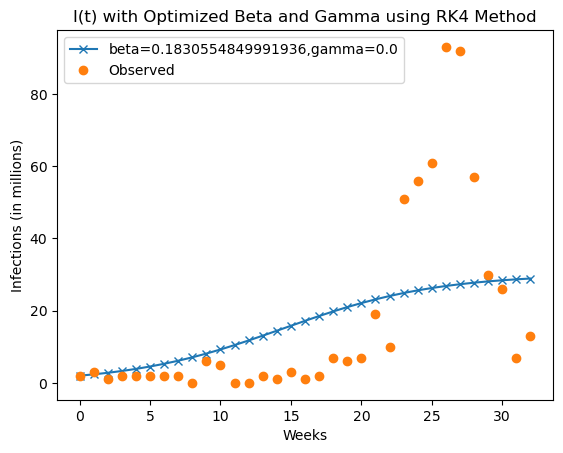

SSE: 459.2748723464933


In [7]:
# SSE comparison between Euler's method and RK4 (solve_ivp) of entire dataset

# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.

#Import scipy's solve_ivp and minimize to first re-implement SIR model and then optimize beta and gamma 
from scipy.integrate import solve_ivp 
from scipy.optimize import minimize

#Redefine given data for clarity
I_obs = data['confirmed_cases'].values.astype(float) # Set up I_obs array from data directly 
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in weeks

N = population 
I0_obs = data.iloc[0]['confirmed_cases'] 
R0_obs = 0.0 
S0_obs = N - I0_obs - R0_obs

#Create system of ODEs under one function
def fun(t, y, beta, gamma, N): 
    S, I, R = y 
# Return derivative based on SIR model 
    dS = -beta*I*S / N 
    dI = (beta*I*S) / N - (gamma*I) 
    dR = gamma*I 
    return dS, dI, dR

#Solve for beta and gamma with solve_ivp (RK4 Method) 
#Define integration range and initial conditions
t_span = [t_obs[0], t_obs[-1]] 
y0 = [S0_obs, I0_obs, R0_obs] 
#Create function to iterate through different beta and gamma values to find optimal values with new SIR model 
def SSE_RK4(params): 
    beta, gamma = params 
    sol = solve_ivp(lambda t, y: fun(t, y, beta, gamma, N), 
                    t_span, y0, t_eval=t_obs, method='RK45') 
    I_pred = sol.y[1] 
    return np.mean((I_pred - I_obs)**2)

#Use scipy.minimize to find optimized beta and gamma
params0 = [0.01, 0.01] 
res = minimize(SSE_RK4, params0, bounds=[(0,1),(0,1)]) 
beta_opt, gamma_opt = res.x 
print("Optimal beta:", beta_opt) 
print("Optimal gamma:", gamma_opt)

#Re-solve SIR model with optimized beta and gamma 
beta = beta_opt 
gamma = gamma_opt 
sol_optimized = solve_ivp(lambda t, y: fun(t, y, beta, gamma, N), 
                          t_span, y0, t_eval=t_obs, method='RK45')

#Plot optimized beta and gamma with I(t) 
I = sol_optimized.y[1] 
plt.plot(t_obs, I, label=f'beta={beta},gamma={gamma}', marker='x') 
plt.plot(t_obs, I_obs, 'o', label='Observed') 

plt.legend() 
plt.xlabel('Weeks') 
plt.ylabel('Infections (in millions)') 
plt.title('I(t) with Optimized Beta and Gamma using RK4 Method') 
plt.show() 

#Print SSE of model 
SSE_RK4_opt = np.mean((I - I_obs)**2) 
print('SSE:', SSE_RK4_opt)


Optimal beta: 0.2992140933508182
Optimal gamma: 0.24627375797242443


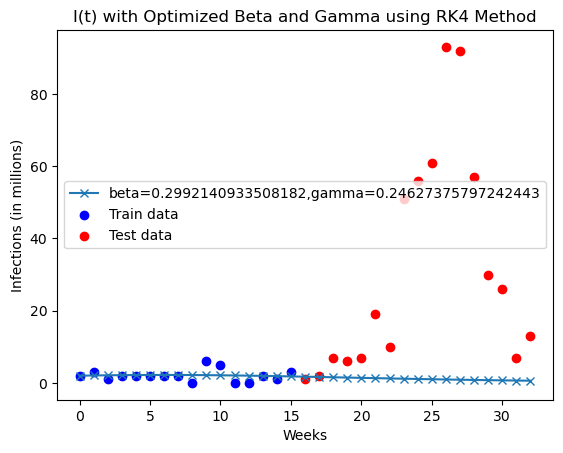

SSE: 1834.544818778764


In [8]:
# SSE comparison between Euler's method and RK4 (solve_ivp) of split dataset


#Import scipy's solve_ivp and minimize to first re-implement SIR model and then optimize beta and gamma
from scipy.integrate import solve_ivp
from scipy.optimize import minimize


#Redefine given data and variables for clarity
I_obs = data['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in weeks

N = population
I0_obs = data.iloc[0]['confirmed_cases']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

half = len(I_obs) // 2
# Training data (first half)
I_train = I_obs[:half]
t_train = t_obs[:half]
# Testing data (second half)
I_test = I_obs[half:]
t_test = t_obs[half:]


#Create system of ODEs under one function
def fun(t, y, beta, gamma, N):
    S, I, R = y
    # Return derivative based on SIR model
    dS = -beta*I*S / N
    dI = (beta*I*S) / N - (gamma*I)
    dR = gamma*I
    return dS, dI, dR


#Solve for beta and gamma with solve_ivp (RK4 Method) for the first half of dataset
#Define integration range and initial conditions
t_span_train = [t_train[0], t_train[-1]]
y0 = [S0_obs, I0_obs, R0_obs]
#Create function to iterate through different beta and gamma values to find optimal values with new SIR model
def SSE_RK4(params):
    beta, gamma = params
    sol = solve_ivp(lambda t, y: fun(t, y, beta, gamma, N),
                    t_span_train, y0, t_eval=t_train, method='RK45')
    I_pred = sol.y[1]
    return np.mean((I_pred - I_train)**2)


#Use scipy.minimize to find optimized beta and gamma
params0 = [0.01, 0.01]
res = minimize(SSE_RK4, params0, bounds=[(0,1),(0,1)])
beta_opt, gamma_opt = res.x
print("Optimal beta:", beta_opt)
print("Optimal gamma:", gamma_opt)


#Re-solve SIR model with optimized beta and gamma now including second half of dataset
beta = beta_opt
gamma = gamma_opt
t_span = [t_obs[0], t_obs[-1]]
sol_optimized = solve_ivp(lambda t, y: fun(t, y, beta, gamma, N),
                t_span, y0, t_eval=t_obs, method='RK45')


#Plot optimized beta and gamma of first half against second half of I(t)
I = sol_optimized.y[1]

plt.plot(t_obs, I, label=f'beta={beta},gamma={gamma}', marker='x')
plt.scatter(t_train, I_train, color="blue", label="Train data")
plt.scatter(t_test, I_test, color="red", label="Test data")

plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections (in millions)')
plt.title('I(t) with Optimized Beta and Gamma using RK4 Method')
plt.show()


#Print SSE from testing second half of model
SSE_RK4_opt = np.mean((I[half:] - I_test)**2)
print('SSE:', SSE_RK4_opt)


Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?

RK4 did not do a better job, having an SSE of around 1834 while Euler's Method computed 1768. Since RK4 uses both the midpoint and the next point in its model, it is inherently highly dependent on the training data and any of its fluctuations. Being more accurate to the first half of the data, this model is more incapable of predicting the spike in infections in the second half because it expects the data to appear as flat as the first half. Thus, the SSE increased for RK4 when compared with Euler's since it likely became more accurate to the first half of data, though also became less accurate in predictions for the second half as the two parts behave starkingly different.

#### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Options to overcome limitations (choose ONE to implement):</b> 

<ol>
<li> Include births in the model as described in reading.</li> 
<li>Include deaths in the model as described in reading.</li>
<li>Include an exposed compartment (SEIR model). </li>
<li>Include loss of immunity (i.e. R population can go back to S population).</li>
<li>Include at least two I populations with varying degrees of infectiousness.</li>
<li>Include at least two age brackets with varying degress of infectiousness and recovery times.</li>

</ol>

Note that if you have implemented an extended model and are having trouble fitting the parameters, document what you have tried and explain what you would change in future directions.
</div>



Optimal beta: 0.4517358301831493
Optimal gamma: 0.0


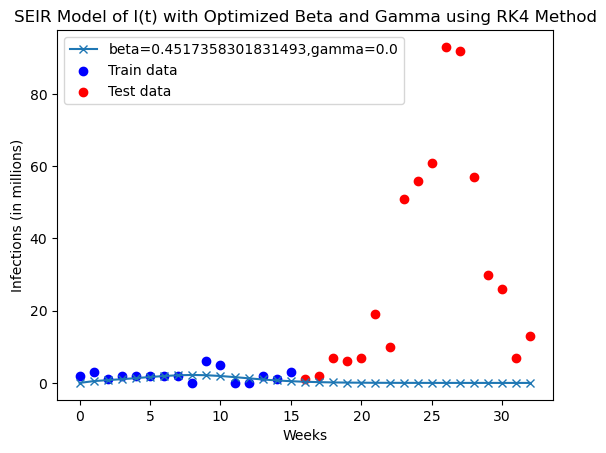

SSE: 1894.2369924526593


In [12]:
# Extended model implementation, parameter fitting, and plotting; now including exposed compartment, making a SEIR model


# Latency period in the SEIR model is defined by 1/sigma, and the median latency period for MERS-COV is 5.4 days (Lee, Jacob. “Better Understanding on MERS Corona Virus Outbreak in Korea.” Journal of Korean medical science vol. 30,7 (2015): 835-6. doi:10.3346/jkms.2015.30.7.835)
#Converting to weeks (since the data is in weeks), the latency period is about 0.77 weeks
#This means that 0.77 = 1/sigma, so sigma is about 1.30


#Import scipy's solve_ivp and minimize to first re-implement SEIR model and then optimize beta and gamma
from scipy.integrate import solve_ivp
from scipy.optimize import minimize


#Redefine given data and variables for clarity, now adding exposure component and train/test split
I_obs = data['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs))   # Time array in weeks

N = population
I0_obs = data.iloc[0]['confirmed_cases']
E0_obs = 0.0   # Assuming data is starting from first cases of infection
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

half = len(I_obs) // 2
# Training data (first half)
I_train = I_obs[:half]
t_train = t_obs[:half]
# Testing data (second half)
I_test = I_obs[half:]
t_test = t_obs[half:]


#Create system of ODEs under one function with additional exposure component
def fun(t, y, beta, gamma, N):
    S, E, I, R = y
    sigma = 1.30
    # Return derivative based on SIR model
    dS = -beta*I*S / N
    dE = (beta*I*S) / N - (sigma*E)
    dI = (sigma*E) - (gamma*I)
    dR = gamma*I
    return dS, dE, dI, dR


#Solve for beta and gamma with solve_ivp (RK4 Method) for the first half of dataset
#Define integration range and initial conditions
t_span_train = [t_train[0], t_train[-1]]
y0 = [S0_obs, E0_obs, I0_obs, R0_obs]
#Create function to iterate through different beta and gamma values to find optimal values with new SIR model
def SSE_RK4(params):
    beta, gamma = params
    sol = solve_ivp(lambda t, y: fun(t, y, beta, gamma, N),
                    t_span_train, y0, t_eval=t_train, method='RK45')
    I_pred = sol.y[1]
    return np.mean((I_pred - I_train)**2)


#Use scipy.minimize to find optimized beta and gamma
params0 = [0.01, 0.01]
res = minimize(SSE_RK4, params0, bounds=[(0,1),(0,1)])
beta_opt, gamma_opt = res.x
print("Optimal beta:", beta_opt)
print("Optimal gamma:", gamma_opt)


#Re-solve SIR model with optimized beta and gamma now including second half of dataset
beta = beta_opt
gamma = gamma_opt
t_span = [t_obs[0], t_obs[-1]]
sol_optimized = solve_ivp(lambda t, y: fun(t, y, beta, gamma, N),
                t_span, y0, t_eval=t_obs, method='RK45')


#Plot optimized beta and gamma of first half against second half of I(t)
I = sol_optimized.y[1]

plt.plot(t_obs, I, label=f'beta={beta},gamma={gamma}', marker='x')
plt.scatter(t_train, I_train, color="blue", label="Train data")
plt.scatter(t_test, I_test, color="red", label="Test data")

plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections (in millions)')
plt.title('SEIR Model of I(t) with Optimized Beta and Gamma using RK4 Method')
plt.show()


#Print SSE from testing second half of model
SSE_RK4_opt = np.mean((I[half:] - I_test)**2)
print('SSE:', SSE_RK4_opt)

Including an exposure component did not improve the model, but instead increased the SSE from 1835 to 1894. This may be due to latency not being able to influence the model alone due to its magnitude, so including more components like birth, death, and loss immunity would provide a more holistic picture of the populations and may improve the model's accuracy.

## Verify and validate your analysis: 

Verification:
* When using Euler's method and the RK4 method on the entire dataset, the SSE for the infected population prediction went from 512 to 459 respectfully. The RK4 method includes more data about the changes between infected numbers, having four evaluations instead of a single one in Euler's, thus allowing RK4 method to follow the data more closely with each step size. Since RK4 reflects the data more accurately, it will then have decreased error when compared with the original data. The decrease in SSE between the models is therefore supported by the methodology behind the method of prediction.
* When using Euler's method and the RK4 method on the first half of the dataset to train, then the second half to test, the SSE jumps to the thousands. Euler's method resulted in 1768, RK4 in 1835, and RK4, including exposure, in 1894. The great increase in SSE is likely due to the nature of the data. The first half is seen to be mainly stagnant, with small increases in the infected population. Regardless of the model, it will base its predictions off its training data, and since the training data does not have many fluctuations, the model will predict the same stagnant situation. In reality, however, the second half of the data spikes much higher than the first half, and decreasing to the initial population at the end of the dataset. The unpredictability of this spike resulted in a highly inaccurate prediction from both models, which is supported by the great increase in SSE. 
* When taking measures that was expected to improve the model predictions, the SSE actually increased as mentioned in the previous bullet. This trend can be explained by the amount of data retrieved by each model. Since the RK4 method is more dependent on the small changes within the training data, then it is more reliant on the trend of the training data than Euler's method. The RK4's predicted model would look more stagnant and thus be more different from the peak seen in the second half of the data, increasing in SSE. Including an exposure component may have done something similar, where the model is more reliant on the initial training data, so it would be more inaccurate from the second half. The exposure component may have also not be as effective without accounting for birth, death, and loss immunity, since they are all found in the SEIR componenets and therefore rely on eachother. Potentially, then, more traits could help predict the peak that happens in the second half. 


Validation:
* Most statistical studies on MERS-COV do not solely use SIR or SEIR as their methods of analysis and prediction, but rather they account for MERS-COV's specific characteristics. 
* One study used a stochastic model to reflect the low incidence numbers of MERS-COV while also separating SEIR components by where the transmission is occurring--MERS-COV is unique such that there is camel-camel, camel-human, and human-human transmission, as well as higher rates of infection seen in hospitals (Chowell, Gerardo et al. “Synthesizing data and models for the spread of MERS-CoV, 2013: key role of index cases and hospital transmission.” Epidemics vol. 9 (2014): 40-51. doi:10.1016/j.epidem.2014.09.011). Several studies therefore use a heterogenous network to model MERS-COV due to this diversity (El-Saka, H.A.A., Obaya, I., Lee, S. et al. Fractional model for Middle East respiratory syndrome coronavirus on a complex heterogeneous network. Sci Rep 12, 20706 (2022). https://doi.org/10.1038/s41598-022-24814-1). 
* By separating types of transmission and mobility, models can more accurately track where infection cases are coming from and how they could behave in the future given its current trends. Given such practices found throughout MERS-COV literature, our SIR and SEIR model may therefore have been too general to fit MERS-COV and is the reason behind the high SSE values. 

## Conclusions and Ethical Implications: 
Conclusions:
* Implementing a SIR and SEIR Model using Euler's or RK4 method did not provide promising predictions as both had extremely high SSE values when using the first half of the data set to predict the second half. Even with the entire dataset as the training data, SSE values were still notably high. Other methods, parameters, and attributes should be considered to model MERS-COV instead of only SIR, SEIR, and infected population numbers.


Ethical Implications:
* Using an inaccurate, too general model misleads policy makers, healthcare workers, and the susceptible population, where, in our case, people will expect MERS-COV to not be a serious, endemic-level disease and that cases will stay only in the tens. Preventative policies could be lifted too early, and people would not practice the safest measures, resulting in higher rates of infection, higher mortality, and more difficulty for the country to recover. 
* Furthermore, using a poor model may result in a lack of public trust in policy makers and scientists researching the disease as the initial predictions seemingly deceived the people, ultimately making future policies harder to implement if the people do not have confidence in them. Even worse, individuals may turn to unreliable news sources for direction on how to combat the disease rather than trained professionals. 

## Limitations and Future Work: 
Limitations:
* Span of data is relatively small--only for about half a year and weekly data does not capture minute changes compared to if it were day-to-day: The more data there is that reflects the infection population changes, the better predictive models can capture those changes
* MERS-COV has similar symptoms as other respiratory illnesses and could be misdiagnosed, or if symptoms were not severe enough, they could have simply not been tested for. As a result, the true number of infected people could be much higher than is reported. This was the case for one study, where an additional hundred cases were previously found unreported then later added to their model, as well as an additional hundred of non-attributable deaths which had to be accounted for with other measures (Majumder MS, Rivers C, Lofgren E, Fisman D. Estimation of MERS-Coronavirus Reproductive Number and Case Fatality Rate for the Spring 2014 Saudi Arabia Outbreak: Insights from Publicly Available Data. PLOS Currents Outbreaks. 2014 Dec 18 . Edition 1. doi: 10.1371/currents.outbreaks.98d2f8f3382d84f390736cd5f5fe133c.)


Future Work:
* Including all attributes in the SEIR model, that is also including birth, death, and loss of immunity, may make our SEIR model more accurate since these factors and each SEIR component rely on each other, so not including them in our model may have impacted its accuracy.
* Since the given data only contains the date and reported number of infected, finding a more comprehensive dataset that better details the unique characteristics of MERS-COV, such as mobility, type of transmission, age groups, and difficulty to diagnose, and using those additional factors in a SEIR model will likely provide a more accurate predictive model. The more specific the data is, the more information the model has to attempt to make a prediction. An agency-based model may also better reflect these factors over a SEIR model.
* Researching the behavior of other diseases in the same family as MERS-COV that have already had a long history could help make predictions for MERS-COV if they are similar enough
* Additionally, MERS-COV has had a history of being difficult to officially report and diagnose, so awareness campaigns about the disease as well as encouragement to test and take preventative measures should be made to reduce the rate of infection. This would ease the workload on healthcare workers, and give more time and data for scientists and statisticians to develop proper treatment and forecasts of the disease.

## NOTES FROM YOUR TEAM: 
* 11/18: Introduction to SIR modeling
* 11/20: Solving SIR model with Euler's method
* 11/25: Fitting beta and gamma to the Euler's method SIR model
* 12/2: Splitting the data into its first and second half to use the first to optimize beta and gamma and second to test their accuracy
* 12/4: Fitting beta and gamma to the RK4 method SIR model
* 12/9: Expanded SIR models and how to implement them in our model
* 12/16: Finalize notebook and presentation


## References:


OpenAI. (2025). ChatGPT (Dec 16 version) [Large language model]. https://chat.openai.com/share/dccb3610-1db9-4eed-88b1-cdb06f67982a.

In this project. ChatGPT was used for guidance on how to carry out certain tasks like the splitting, training, and testing halves of the data, forming an optimization routine, and generating plots. It was also used to debug.

Microsoft. (2025). Copilot [Large language model]. Microsoft. https://copilot.microsoft.com

In this project. Copilot was also used for guidance on how to carry out certain tasks like the splitting, training, and testing halves of the data, forming an optimization routine, and generating plots. It was also used to debug.

## QUESTIONS FOR YOUR TA: 
*N/A*